# Introduction

This notebook combines all the other individual examples. It is intended only for use on the Geography cluster, so does not have the alternate cells needed to download and load the files on your own laptop. For those commands please see the indiivdual tutorial notebooks.

### Import packages and define fucntions for calculations

In [90]:
'''Import packages for loading data, analysing, and plotting'''

import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
import cartopy
import cartopy.crs as ccrs
import matplotlib
from netCDF4 import Dataset
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy.ma as ma


import os
import matplotlib.colors as colors

import scipy
from cartopy.util import add_cyclic_point
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


## Examples to define variable name, file directory and filenames

Below are the examples of varibale name and filenames under different scenarios. Copy the appropriate format to be used in calculations.

In [9]:
'''Define variables'''
#cvdp results
period='1981-2010'
ssp='ssp585'
variable_name='tas_spatialmean_ann'

directory='/data/aod/cvdp_cmip6/geog0121/UKESM1-0-LL_ssps.wrt_%s' %period
filename='%s/UKESM1_%s_%s.cvdp_data.1850-2100.nc'%(directory,ssp,period)


In [ ]:
#raw files downloaded from ESGF
#ScenarioMIP

period='201501-204912'
ssp='ssp585'
var='ta'

directory='/data/CMIP/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/%s/r1i1p1f2/*/%s/gn/v*' %(ssp,var)
filename='%s/%s_*_UKESM1-0-LL_%s_r1i1p1f2_gn_%s.nc'%(directory,var,ssp,period)

#CMIP6 historical
experiment='historical'

directory='/data/CMIP/CMIP6/CMIP/MOHC/UKESM1-0-LL/%s/r1i1p1f2/*/hur/gn/v*' %experiment
filename='%s/%s_*_UKESM1-0-LL_%s_r1i1p1f2_gn_*.nc'%(directory,var,ssp,experiment)


# Example of cvdp output calculations (open file via xarray)

# annual temperature anomalies, seasonal precipitation anomalies

# Global and regional Geo2D maps

In [2]:


#define filenames and their directories
period1='1851-1900'
ssp1='ssp585'

directory1='/data/aod/cvdp_cmip6/geog0121/UKESM1-0-LL_ssps.wrt_%s' %period1
filename_a='%s/UKESM1_%s_%s.cvdp_data.1850-2100.nc'%(directory1,ssp1,period1)



directory2='/data/aod/cvdp_cmip6/geog0121/UKESM1-0-LL_historical.vsObs' 
filename_b='%s/UKESM1-0-LL_PresentDay.cvdp_data.1850-2014.nc'%(directory2)


# load files

expt_a_file=xr.open_dataset(filename_a,decode_times=False)
expt_b_file=xr.open_dataset(filename_b,decode_times=False)

lat=expt_a_file['lat']
lon=expt_a_file['lon']



## annual mean temperature anomalies

In [3]:

variable_name='tas_spatialmean_ann'

expt_a=expt_a_file[variable_name]
expt_b=expt_b_file[variable_name]
diff=expt_a-expt_b



In [5]:
# THIS LINE ONLY WORKS IN NEW VERSIONS OF CARTOPY (so not in geog0111 on the Geography cluster) 
diff, lon = add_cyclic_point(diff.values, coord=lon)


TypeError: invalid indexer array, does not have integer dtype: array([slice(None, None, None), slice(0, 1, None)], dtype=object)

### Plotting

In [5]:
#temperatures
cmap=plt.get_cmap('bwr') #define colormap

#define colormap's range and scale
clim=[-6,6]
bounds = np.linspace(clim[0], clim[1], 21)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)



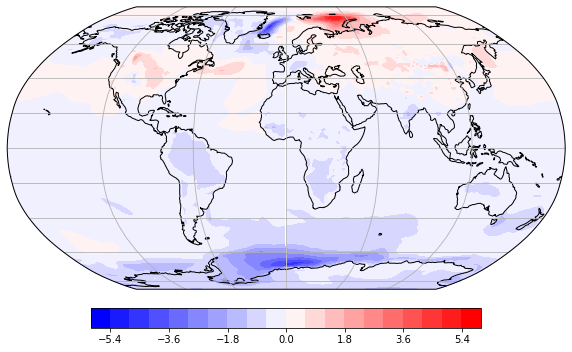

In [6]:
#Global map

projection = ccrs.Robinson()
transform=ccrs.PlateCarree()

plt.figure(figsize=(10,7))
ax = plt.axes(projection=projection)
ax.coastlines()
ax.gridlines()

fig=ax.contourf(lon,lat,diff,levels=bounds, transform=transform,cmap=cmap,norm=norm)
cax,kw = matplotlib.colorbar.make_axes(ax,location='bottom',pad=0.05,shrink=0.7)
plt.colorbar(fig,cax=cax,extend='both',**kw)

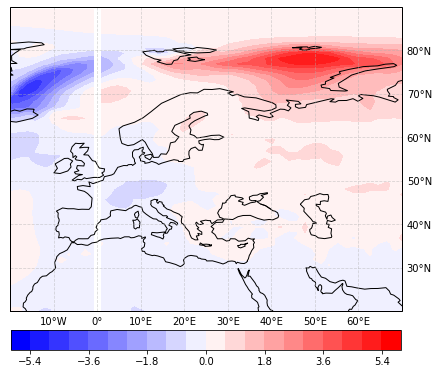

In [7]:
#Regional map
region=[-20,70,20,90] #[lon_min,lon_max,lat_min,lat_max]

projection = ccrs.PlateCarree(central_longitude=0.0, globe=None)
transform=ccrs.PlateCarree()

plt.figure(figsize=(10,7))
ax = plt.axes(projection=projection)

ax.coastlines()
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
#gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER


fig=ax.contourf(lon,lat,diff,levels=bounds, transform=transform,cmap=cmap,norm=norm)
ax.set_extent(region, ccrs.PlateCarree())

cax,kw = matplotlib.colorbar.make_axes(ax,location='bottom',pad=0.05,shrink=0.7)
plt.colorbar(fig,cax=cax,extend='both',**kw)

#plt.savefig(figname)

## seasonal precipitation anomalies

In [76]:
#seasonal precipitation anomalies
variable_name='pr_spatialmean_djf'
expt_a=expt_a_file[variable_name]
expt_b=expt_b_file[variable_name]
diff=expt_a-expt_b

### plotting

In [87]:
#precipitations
cmap=plt.get_cmap('BrBG') #define colormap

#define colormap's range and scale

bounds = [-3,-2,-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1,2,3]
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)

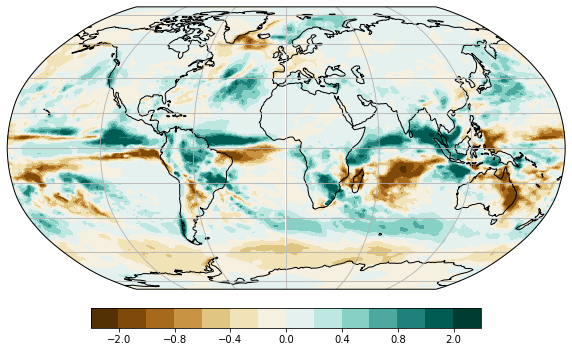

In [88]:
#Global map

projection = ccrs.Robinson()
transform=ccrs.PlateCarree()

plt.figure(figsize=(10,7))
ax = plt.axes(projection=projection)
ax.coastlines()
ax.gridlines()

fig=ax.contourf(lon,lat,diff,levels=bounds, transform=transform,cmap=cmap,norm=norm)
cax,kw = matplotlib.colorbar.make_axes(ax,location='bottom',pad=0.05,shrink=0.7)
plt.colorbar(fig,cax=cax,extend='both',**kw)

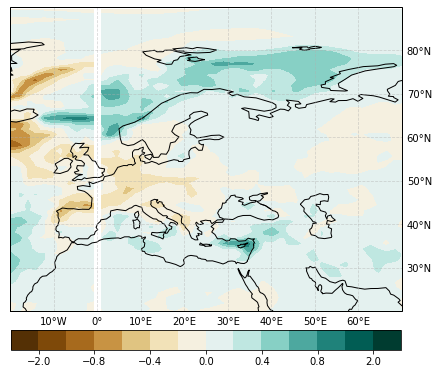

In [89]:
#Regional map
region=[-20,70,20,90] #[lon_min,lon_max,lat_min,lat_max]

projection = ccrs.PlateCarree(central_longitude=0.0, globe=None)
transform=ccrs.PlateCarree()

plt.figure(figsize=(10,7))
ax = plt.axes(projection=projection)

ax.coastlines()
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
#gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER


fig=ax.contourf(lon,lat,diff,levels=bounds, transform=transform,cmap=cmap,norm=norm)
ax.set_extent(region, ccrs.PlateCarree())

cax,kw = matplotlib.colorbar.make_axes(ax,location='bottom',pad=0.05,shrink=0.7)
plt.colorbar(fig,cax=cax,extend='both',**kw)



# Example of raw data calculations (open via Dataset)
# Vertical profile of atmosphere

In [15]:
variable_name='ta'
filename_a='/data/CMIP/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/ssp370/r1i1p1f2/Amon/ta/gn/v20190510/ta_Amon_UKESM1-0-LL_ssp370_r1i1p1f2_gn_201501-204912.nc'

filename_b='/data/CMIP/CMIP6/CMIP/MOHC/UKESM1-0-LL/historical/r1i1p1f2/Amon/ta/gn/v20190406/ta_Amon_UKESM1-0-LL_historical_r1i1p1f2_gn_185001-194912.nc'


In [16]:

#This cell will calculate the difference between two experiments
expt_a_file=Dataset(filename_a)
expt_a=expt_a_file[variable_name][:]
lat=expt_a_file['lat'][:]
lon=expt_a_file['lon'][:]
lev=expt_a_file['plev'][:]
expt_b_file=Dataset(filename_b)
expt_b=expt_b_file[variable_name][:]
expt_a_file.close()
expt_b_file.close()

In [40]:
#time averaged
ta_a=np.average(expt_a,axis=0)
ta_b=np.average(expt_b,axis=0)

In [48]:
#change
diff=ta_a-ta_b

#zonal changes
zonal_diff=np.nanmean(np.array(diff),axis=2)

## vertival profile of atmosphere

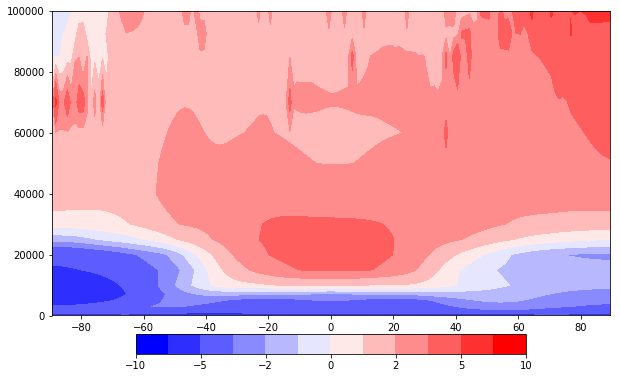

In [62]:
cmap=plt.get_cmap('bwr') #define colormap

#define colormap's range and scale

bounds = [-10,-7,-5,-3,-2,-1,0,1,2,3,5,7,10]
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)


plt.figure(figsize=(10,7))

ax = plt.axes()
fig=ax.contourf(lat,lev,np.array(zonal_diff),levels=bounds,cmap=cmap,norm=norm)


cax,kw = matplotlib.colorbar.make_axes(ax,location='bottom',pad=0.05,shrink=0.7)
plt.colorbar(fig,cax=cax,extend='both',**kw)


In [ ]:
## 1D timeseries of monthly global mean teperature

In [13]:
variable_name='tas'
filename_a='/data/CMIP/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/ssp370/r1i1p1f2/Amon/tas/gn/v20190510/tas_Amon_UKESM1-0-LL_ssp370_r1i1p1f2_gn_201501-204912.nc'



#This cell will calculate the difference between two experiments
expt_a_file=Dataset(filename_a)
expt_a=expt_a_file[variable_name][:]
lat=expt_a_file['lat'][:]
lon=expt_a_file['lon'][:]

expt_a_file.close()


In [17]:
expt_a.shape

(420, 144, 192)

In [18]:
weight=np.ones((lat.shape[0],lon.shape[0]))

In [19]:
weight.shape

(144, 192)

In [89]:
#area weighted average temeprature
weight=np.ones((lat.shape[0],lon.shape[0]))
for i in range(lat.shape[0]):
    w=lat[i]*np.pi/180
    wc=np.cos(w)
    weight[i]=weight[i]*wc
    
ave=np.zeros(expt_a.shape[0])
for t in range(expt_a.shape[0]):
    ave[t]=np.average(expt_a[t],weights=weight)

TypeError: Axis must be specified when shapes of a and weights differ.

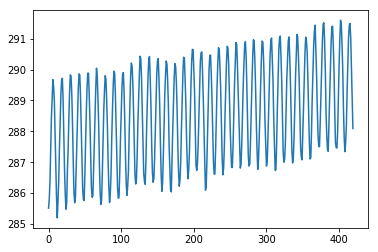

In [23]:
plt.plot(ave)

# Sea ice

In [2]:
variable_name='sic_nh_spatialmean_ann'

period1='1851-1900'
ssp1='ssp585'

directory1='/data/aod/cvdp_cmip6/geog0121/UKESM1-0-LL_ssps.wrt_%s' %period1
filename_a='%s/UKESM1_%s_%s.cvdp_data.1850-2100.nc'%(directory1,ssp1,period1)

period2='2071-2100'
ssp2='ssp585'
directory2='/data/aod/cvdp_cmip6/geog0121/UKESM1-0-LL_ssps.wrt_%s' %period2
filename_b='%s/UKESM1_%s_%s.cvdp_data.1850-2100.nc'%(directory2,ssp2,period2)

In [3]:
#This cell will calculate the difference between two experiments
expt_a_file=xr.open_dataset(filename_a,decode_times=False)
expt_a=expt_a_file[variable_name]

expt_b_file=xr.open_dataset(filename_b,decode_times=False)
expt_b=expt_b_file[variable_name]



In [4]:
# coordiantes
lon_nh=expt_a_file.lon2d_ice_nh
lat_nh=expt_a_file.lat2d_ice_nh
lon_sh=expt_a_file.lon2d_ice_sh
lat_sh=expt_a_file.lat2d_ice_sh

In [6]:
expt_a

<xarray.DataArray 'sic_nh_spatialmean_ann' (j: 330, i: 360)>
[118800 values with dtype=float32]
Coordinates:
  * i             (i) int32 0 1 2 3 4 5 6 7 ... 352 353 354 355 356 357 358 359
  * j             (j) int32 0 1 2 3 4 5 6 7 ... 322 323 324 325 326 327 328 329
    lat2d_ice_nh  (j, i) float32 ...
    lat2d_ice_sh  (j, i) float32 ...
    lon2d_ice_nh  (j, i) float32 ...
    lon2d_ice_sh  (j, i) float32 ...
Attributes:
    history:         2019-04-05T15:48:59Z altered by CMOR: Converted units fr...
    original_units:  1
    original_name:   mo: (variable_name: aice)
    units:           %
    comment:         Area fraction of grid cell covered by sea ice
    long_name:       Northern Hemisphere sic mean (annual)
    standard_name:   sea_ice_area_fraction

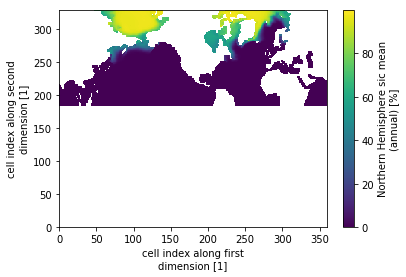

In [105]:
expt_a.plot()

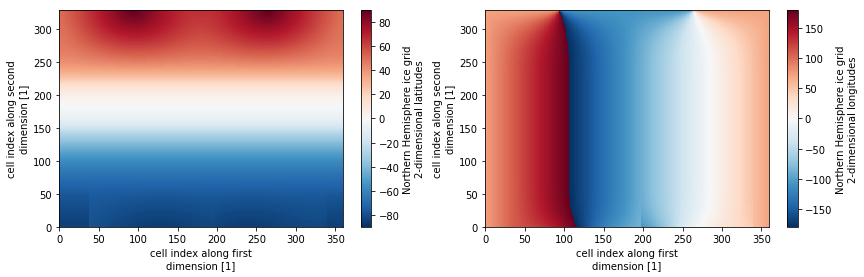

In [107]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,4))
lat_nh.plot(ax=ax1)
lon_nh.plot(ax=ax2)

In [ ]:
#remove all 0 
ice=expt_a.where(expt_a>0)

In [ ]:
cmap=plt.get_cmap('rainbow')
projection = ccrs.PlateCarree(central_longitude=0.0, globe=None)

transform=ccrs.PlateCarree()

bounds = np.linspace(0, 100, 21)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)



plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.Orthographic(central_latitude=90.0))
ax.add_feature(cartopy.feature.LAND, zorder=1,facecolor=cartopy.feature.COLORS['land_alt1'])
ax.coastlines(resolution='110m', linewidth=0.5)
ax.gridlines()

fig=ax.pcolormesh(lon_nh,lat_nh,ice, transform=transform,cmap=cmap,norm=norm)

#add bounday of expt_b
#ax.contour(lon_nh,lat_nh,expt_b, colors='black', levels=[1], linewidth=4, transform=transform)

cax,kw = matplotlib.colorbar.make_axes(ax,location='bottom',pad=0.05,shrink=0.7)

plt.colorbar(fig,cax=cax,**kw)


# winds


In [83]:
file1='/data/CMIP/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/ssp370/r1i1p1f2/Amon/va/gn/v20190510/va_Amon_UKESM1-0-LL_ssp370_r1i1p1f2_gn_201501-204912.nc'
file2='/data/CMIP/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/ssp370/r1i1p1f2/Amon/ua/gn/v20190510/ua_Amon_UKESM1-0-LL_ssp370_r1i1p1f2_gn_201501-204912.nc'
d1=Dataset(file1)
va=d1.variables['va'][:]
d2=Dataset(file2)
ua=d2.variables['ua'][:]
lat=d2.variables['lat'][:]
lon=d2.variables['lon'][:]-180 #change [0,360] to [-180,180]
plev=d2.variables['plev'][:] #pressure in Pa, from surface to top


In [ ]:
# vas files have issues in latitude, as they are hald grid shifted. 
#vIf you want to look at surface v wind in vas files, fix its resolution first as:

#solve the lat. grid problem (lat is half grid shifted )
va_fixed=np.zeros((va.shape[0],va.shape[1]-1,va.shape[2]))
for i in range(va.shape[1]-1):
    va_fixed[:,i,:]=(va[:,i,:]+va[:,i+1,:])/2

In [84]:
lon2d, lat2d = np.meshgrid(lon, lat)

In [85]:
#averaged wind stress
va_ave=np.average(va,axis=0)
ua_ave=np.average(ua,axis=0)

In [86]:
# wind stress at chosen pressure level
#surface at 1000mb
va_1000mb=va_ave[0]
ua_1000mb=ua_ave[0]
#at 850mb
va_850mb=va_ave[2]
ua_850mb=ua_ave[2]
#at 500mb
va_500mb=va_ave[5]
ua_500mb=ua_ave[5]
#at 250mb
va_250mb=va_ave[8]
ua_250mb=ua_ave[8]



In [ ]:
#If you want to calculate the average among levels:
va_level=np.average(va_ave[level1:level2],axis=0)

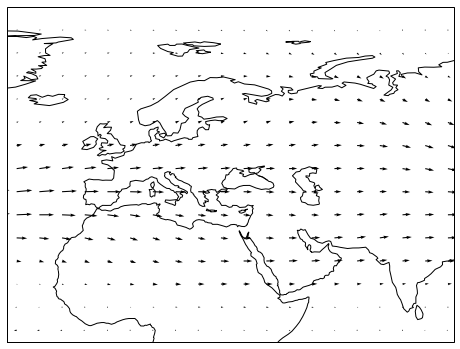

In [88]:
region=[-30, 90, 0, 90] #[lon_min,lon_max,lat_min,lat_max]
projection=ccrs.PlateCarree()
transform=ccrs.PlateCarree()
plt.figure(figsize=(8, 10))
ax = plt.axes(projection=projection)
ax.coastlines()
ax.quiver(lon2d, lat2d, ua_250mb, va_250mb, transform=transform,regrid_shape=30)
ax.set_extent(region, ccrs.PlateCarree())


# sea surface temperature

In [ ]:
variable_name='tos'
filename_a='/data/CMIP/CMIP6/CMIP/MOHC/UKESM1-0-LL/historical/r1i1p1f2/Omon/tos/gn/v20190406/tos_Omon_UKESM1-0-LL_historical_r1i1p1f2_gn_185001-194912.nc'
filename_b=''

expt_a_file=xr.open_dataset(filename_a,decode_times=False)
expt_a=expt_a_file[variable_name]

expt_b_file=xr.open_dataset(filename_b,decode_times=False)
expt_b=expt_b_file[variable_name]

#2D coordinates
latitude=expt_a_file[latitude]
longitude=expt_a_file[longitude]

In [ ]:
diff=expt_a-expt_b

In [ ]:
#temperatures
cmap=plt.get_cmap('bwr') #define colormap

#define colormap's range and scale
clim=[-6,6]
bounds = np.linspace(clim[0], clim[1], 21)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)

In [ ]:
#Global map

projection = ccrs.Robinson()
transform=ccrs.PlateCarree()

plt.figure(figsize=(10,7))
ax = plt.axes(projection=projection)

ax.coastlines(resolution='110m', linewidth=0.5)
ax.gridlines()

fig=ax.pcolormesh(longitude,latitude,diff,transform=transform,cmap=cmap,norm=norm)
ax.add_feature(cartopy.feature.LAND, zorder=1,facecolor=cartopy.feature.COLORS['land_alt1'])
cax,kw = matplotlib.colorbar.make_axes(ax,location='bottom',pad=0.05,shrink=0.7)
plt.colorbar(fig,cax=cax,extend='both',**kw)

In [ ]:
#Regional map
region=[-20,70,20,90] #[lon_min,lon_max,lat_min,lat_max]

projection = ccrs.PlateCarree(central_longitude=0.0, globe=None)
transform=ccrs.PlateCarree()

plt.figure(figsize=(10,7))
ax = plt.axes(projection=projection)

ax.coastlines()
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
#gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER


fig=ax.pcolormesh(longitude,latitude,diff, transform=transform,cmap=cmap,norm=norm)
ax.add_feature(cartopy.feature.LAND, zorder=1,facecolor=cartopy.feature.COLORS['land_alt1'])
ax.set_extent(region, ccrs.PlateCarree())

cax,kw = matplotlib.colorbar.make_axes(ax,location='bottom',pad=0.05,shrink=0.7)
plt.colorbar(fig,cax=cax,extend='both',**kw)

#plt.savefig(figname)

# Save variables to a new netcdf4 file

In [ ]:
#Create a nc file to save data


d=Dataset('filename.nc','w',format='NETCDF4')
d.createDimension('lon',lon.shape[0])  
d.createDimension('lat',lat.shape[0])  
d.createVariable("lon",'f',("lon"))  
d.createVariable("lat",'f',("lat"))  

d.variables['lat'][:]=lat     
d.variables['lon'][:]=lon 
d.close()

In [ ]:
variable_name='example'
#Add or edit nc file
d=Dataset('plotting_data/PMIP4_lig127k_Ensembles.nc','a')
d.createVariable(variable_name,'f',('lat','lon'))
d.variables[varianle_name][:]=var #variable you want to save    

d.close()